In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


selecting the matrix of features

In [3]:
X = dataset.iloc[:,[3,4]].values

### Building the dendrogram while implementing the agglomerative HC 

In [4]:
import scipy.cluster.hierarchy as sch

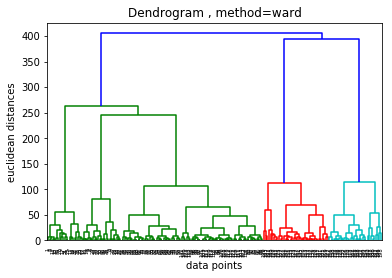

In [5]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel("data points")
plt.ylabel("euclidean distances")
plt.title("Dendrogram , method=ward")
plt.show()

note that the longest segment of a line which is not crossed by an extrapolated horizontal line is the rightmost blue line<br>(its lower half)

note that the dissimilarity threshold for this will cross 5 lines: <br>
    the three green ones on the left and <br>
    the two blue ones on the right

This gives us the optimal number of clusters as 5

### fitting the clusterer to the dataset

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [14]:
pd.DataFrame(y_hc)

,0
0,4
1,3
2,4
3,3
4,4
5,3
6,4
7,3
8,4
9,3


### Visualising the clusters 

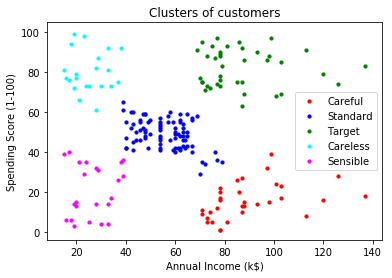

In [17]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 10, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 10, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 10, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 10, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 10, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()